In [2]:
import mujoco_py
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import *
from util import *
from util_fk import *
import cv2

np.set_printoptions(precision=2)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("Ready.")

Done.
Ready.


In [3]:
# env = MuJoCoParserClass(name='UR5e',xml_path='../asset/ur5e/UR5_rg2_gripper.xml')
env = MuJoCoParserClass(name='UR5e',xml_path='../asset/ur5e/ril_robot.xml')
print ("[%s] parsed."%(env.name))

[UR5e] parsed.


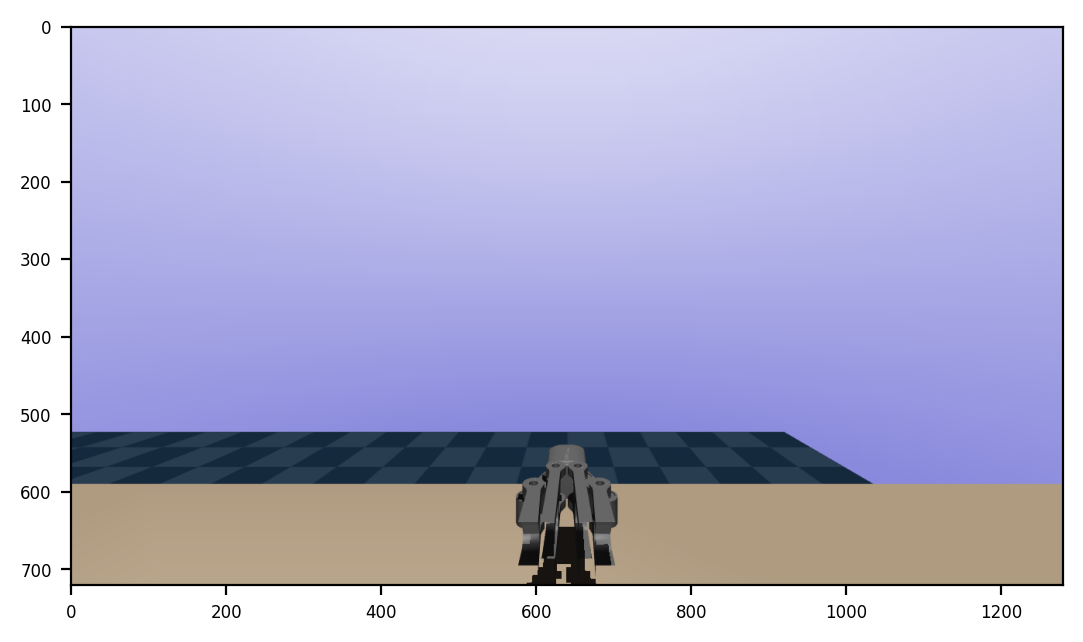

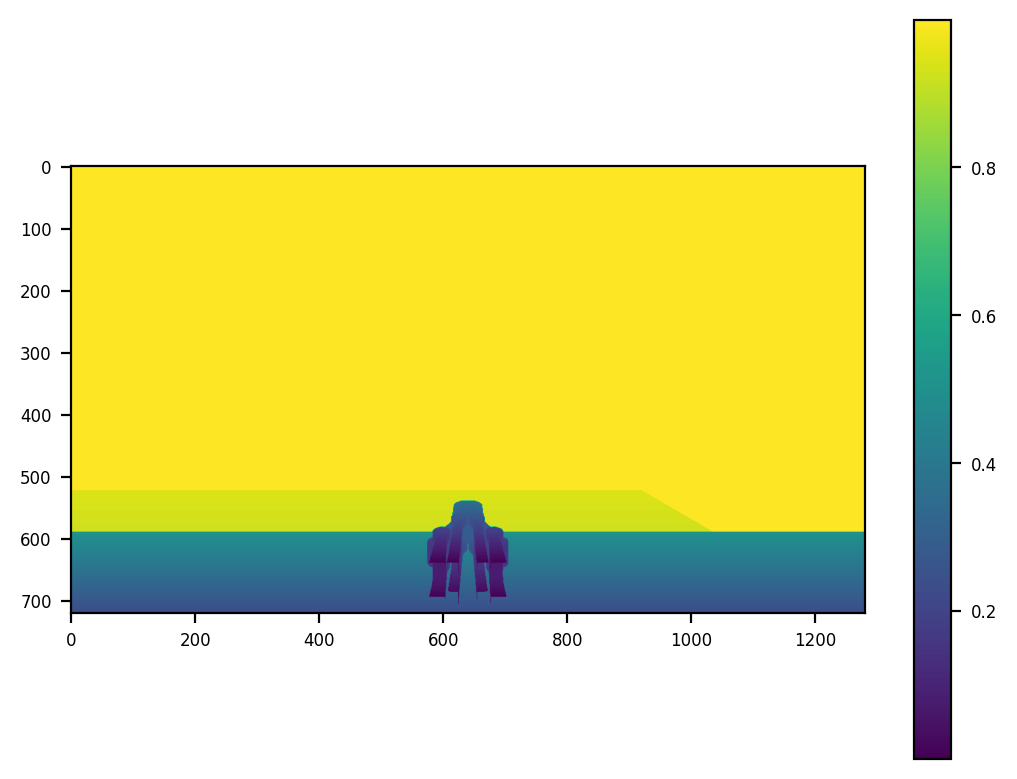

In [4]:
env._get_viewer("rgb_array").render(env.render_width, env.render_height, camera_id=env.model.camera_name2id("egocentric"))
img, img_depth = env.viewer.read_pixels(width=env.render_width,height=env.render_height,depth=True)

img = cv2.flip(cv2.rotate(img,cv2.ROTATE_180),1)        # 0:up<->down, 1:left<->right
img_depth = cv2.flip(cv2.rotate(img_depth,cv2.ROTATE_180),1)        # 0:up<->down, 1:left<->right

plt.imshow(img)
plt.show()

plt.imshow(img_depth)
plt.colorbar()
plt.show()

In [5]:
obj_pos   = [0.7,-0.3+0.1,0.8]


env.render_lidar(obj_pos, )

NameError: name 'render_lidar' is not defined

In [6]:
def render_lidar(env, poses, color, offset, group):
    ''' Render the lidar observation '''
    lidar_num_bins = 10
    
    cam_id = env.model.camera_name2id("egocentric")
    # Rotation of camera in world coordinates
    env.cam_rot_mat = env.model.cam_mat0[cam_id]
    env.cam_rot_mat = np.reshape(env.cam_rot_mat, (3, 3))
    # Position of camera in world coordinates
    env.cam_pos = env.model.cam_pos0[cam_id]

    lidar = obs_lidar_natural(group)
    for i, sensor in enumerate(lidar):
        theta = 2 * np.pi * i / lidar_num_bins
        rad = 0.15
        binpos = np.array([np.cos(theta) * rad, np.sin(theta) * rad, offset])
        pos = env.cam_pos + np.matmul(binpos, env.cam_rot_mat.transpose())
        alpha = min(1, sensor + .1)
        env.viewer.add_marker(pos=pos,
                                size=0.025 * np.ones(3),
                                type=2,
                                rgba=np.array(color) * alpha,
                                label='')

def obs_lidar_natural(env, group):
    '''
    Natural lidar casts rays based on the ego-frame of the robot.
    Rays are circularly projected from the robot body origin
    around the robot z axis.
    '''
    NGROUP = 6
    body = env.model.body_name2id('ur_base')
    grp = np.asarray([i == group for i in range(int(NGROUP))], dtype='uint8')
    pos = np.asarray(self.world.robot_pos(), dtype='float64')
    mat_t = self.world.robot_mat()
    obs = np.zeros(self.lidar_num_bins)
    for i in range(self.lidar_num_bins):
        theta = (i / self.lidar_num_bins) * np.pi * 2
        vec = np.matmul(mat_t, theta2vec(theta))  # Rotate from ego to world frame
        vec = np.asarray(vec, dtype='float64')
        dist, _ = self.sim.ray_fast_group(pos, vec, grp, 1, body)
        if dist >= 0:
            obs[i] = np.exp(-dist)
    return obs


AttributeError: 'MuJoCoParserClass' object has no attribute 'world'

In [7]:
def theta2vec(theta):
    ''' Convert an angle (in radians) to a unit vector in that angle around Z '''
    return np.array([np.cos(theta), np.sin(theta), 0.0])

In [ ]:
dist, _ = self.sim.ray_fast_group(pos, vec, grp, 1, body)


In [ ]:
grp = np.asarray([i == group for i in range(int(6))], dtype='uint8')


In [14]:
cam_id = env.model.camera_name2id("egocentric")
# Rotation of camera in world coordinates
env.cam_rot_mat = env.model.cam_mat0[cam_id]
env.cam_rot_mat = np.reshape(env.cam_rot_mat, (3, 3))
# Position of camera in world coordinates
env.cam_pos = env.model.cam_pos0[cam_id]

grp = np.asarray([i == 0 for i in range(int(6.0))], dtype='uint8')

for i in range(10):
    theta = (i / 10) * np.pi * 2
    vec = np.matmul(env.cam_rot_mat, theta2vec(theta))  # Rotate from ego to world frame
    vec = np.asarray(vec, dtype='float64')
    dist, _ = env.sim.ray_fast_group(env.cam_pos, vec, grp, 1, 0)
    print(dist)

0.35999999999999993
0.44498447189992413
0.7328778462545096
0.7360321934490119
0.4449844718999242
0.35999999999999993
0.1531035975332326
0.09462322707542228
0.09462322707542228
0.15310359753323252


In [13]:
dist

0.15310359753323252

In [9]:
env.cam_pos

array([0.  , 0.01, 0.09])

In [5]:
env.sim.ray_fast_group(env.cam_pos, )

TypeError: ray_fast_group() takes at least 3 positional arguments (0 given)